In [ ]:
 !pip3 install beautifulsoup4

In [ ]:
# Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1-Data Collection:

####-Data Source:
The data for this project was sourced from the Coursera website, specifically from the Data Science topic area. The URL used for scraping contains various parameters such as course difficulty levels, and duration preferences to refine the search results.

####-Data Collection:

The data was collected by web scraping the Coursera website using Python's requests library for making HTTP GET requests and BeautifulSoup for parsing the HTML content. The scraping process involved sending requests to each page of the Coursera courses related to Data Science, filtering them based on various parameters such as difficulty level, duration. Each course's name, organization, rating, level, and duration were extracted from the HTML content of the course cards. The main challenge encountered during the scraping process was adapting to changes in the HTML structure of the Coursera website. When website layouts evolve, it disrupt the scraping code, leading to difficulties in accurately extracting information’s.


In [ ]:

# Function to extract data from each page
def get_data(pageNo):
    # Defining headers to mimic a browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0",
        "Accept-Encoding": "gzip, deflate",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        "DNT": "1",
        "Connection": "close",
        "Upgrade-Insecure-Requests": "1"
    }
    # Sending a GET request to the Coursera website with the specified page number
    r = requests.get('https://www.coursera.org/courses?topic=Data%20Science&productTypeDescription=Courses&productDifficultyLevel=Beginner&productDifficultyLevel=Intermediate&productDifficultyLevel=Advanced&productDifficultyLevel=Mixed&productDuration=1-4%20Weeks&productDuration=1-3%20Months&language=Arabic&language=English&sortBy=BEST_MATCH&page=' + str(pageNo), headers=headers)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')

    alls = []

    # Looping through each course card on the page
    for d in soup.findAll('div', attrs={'class': 'cds-ProductCard-content'}):
        all1 = []  # Resetting all1 for each iteration
        all1.append(d.find('h3', attrs={'class': 'cds-CommonCard-title css-6ecy9b'}).text)
        all1.append(d.find('p', attrs={'class': "cds-ProductCard-partnerNames css-vac8rf"}).text)
        rating_element = d.find('p', attrs={"class": "css-2xargn"})
        rating = rating_element.text if rating_element else 'Rating not found'
        all1.append(rating)
        duration_and_level_tag = d.find('div', class_='cds-CommonCard-metadata').find('p').text
        duration_level_parts = duration_and_level_tag.split(" · ")
        all1.append(duration_level_parts[0] if len(duration_level_parts) >= 1 else 'Unknown')
        all1.append(duration_level_parts[2] if len(duration_level_parts) >= 3 else 'Unknown')

        alls.append(all1)

    return alls

# Initializing an empty list to store results
results = []

# Number of pages to scrape
no_pages = 72

# Scraping data from each page and extending the results list
for i in range(1, no_pages + 1):
    results.extend(get_data(i))

# Creating a DataFrame from the results and writing it to a CSV file
df = pd.DataFrame(results, columns=['Name', 'Organization', 'Rating', 'Level', 'Duration'])
df.to_csv('coursera_courses.csv', index=False, encoding='utf-8')



In [ ]:
df.head(5)

,Name,Organization,Rating,Level,Duration
0,"Foundations: Data, Data, Everywhere",Google,4.8,Beginner,1 - 3 Months
1,Supervised Machine Learning: Regression and Cl...,DeepLearning.AI,4.9,Beginner,1 - 4 Weeks
2,Generative AI for Everyone,DeepLearning.AI,4.8,Beginner,1 - 4 Weeks
3,Prompt Engineering for ChatGPT,Vanderbilt University,4.8,Beginner,1 - 3 Months
4,Ask Questions to Make Data-Driven Decisions,Google,4.7,Beginner,1 - 4 Weeks


# 2-Data Processing and Cleaning:


In the data cleaning process, we meticulously addressed missing values, ensuring completeness and accuracy within the dataset. Additionally, we standardized the duration values, converting them into their maximum duration in weeks. This standardization process improved consistency across the dataset, facilitating easier analysis and comparison. Moreover, we delved into understanding the organizational landscape of unique courses, providing valuable insights into the diversity and coverage of courses offered.

In [ ]:
df.shape

(743, 5)

**standardized course duration into max weeks**

In this code, we standardized the course duration values in the Coursera dataset to ensure consistency and facilitate analysis. Initially, the duration values were in various formats such as "1-4 Weeks" and "1-3 Months." We converted these values into their corresponding maximum duration in weeks. For instance, "1-4 Weeks" was standardized to 4 weeks, and "1-3 Months" was standardized to 12 weeks.

In [ ]:
df = pd.read_csv('coursera_courses.csv')

# Convert duration to integers and standardize to weeks
for index, duration in enumerate(df['Duration']):
    if duration == "1-4 Weeks":
        # Standardize to weeks and convert to integer
        df.at[index, 'Duration'] = 4
    elif duration == "1-3 Months":
        # Standardize to weeks and convert to integer
        df.at[index, 'Duration'] = 12
    elif '-' in duration:
        # Handle cases with ranges like '4-12 Weeks'
        weeks_range = duration.split('-')
        if 'Months' in weeks_range[1]:
            # Convert months to weeks (assuming 1 month = 4 weeks)
            max_weeks = int(weeks_range[1].split()[0]) * 4
        else:
            max_weeks = int(weeks_range[1].split()[0])
        df.at[index, 'Duration'] = max_weeks
    else:
        # Convert single value to integer
        df.at[index, 'Duration'] = int(duration.split()[0])

 # Convert "Rating" column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Write the updated DataFrame back to the CSV file
df.to_csv('coursera_courses_updated.csv', index=False)

# Read the updated DataFrame from the CSV file
df = pd.read_csv('coursera_courses_updated.csv')

# Print the first 50 rows of the dataset
print(df.head(50))

                                                 Name  \
0                 Foundations: Data, Data, Everywhere   
1   Supervised Machine Learning: Regression and Cl...   
2                          Generative AI for Everyone   
3                      Prompt Engineering for ChatGPT   
4         Ask Questions to Make Data-Driven Decisions   
5                        Advanced Learning Algorithms   
6                   Neural Networks and Deep Learning   
7           Python for Data Science, AI & Development   
8                        Prepare Data for Exploration   
9                               What is Data Science?   
10                     Introduction to Data Analytics   
11                         Introduction to Statistics   
12       Introduction to Artificial Intelligence (AI)   
13                   Process Data from Dirty to Clean   
14  Unsupervised Learning, Recommenders, Reinforce...   
15                     Excel Basics for Data Analysis   
16  Improving Deep Neural Netwo

In [ ]:
df.dtypes

Name             object
Organization     object
Rating          float64
Level            object
Duration          int64
dtype: object

**Handling missing values**

In this code, it was imperative to handle missing values by assigning "Unknown" to each missing value. This was essential to ensure the completeness and reliability of the dataset for further processing. By systematically replacing missing values with "Unknown", we guarantee that the dataset remains consistent and ready for analysis.

In [ ]:

df = pd.read_csv('coursera_courses_updated.csv')

# Handling missing values in all columns and assigning them to "Unknown"
for column in df.columns:
    df[column] = df[column].fillna("Unknown")

# Replace missing values in 'Rating' column with the mean of non-missing values
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

df.to_csv('coursera_courses_updated.csv', index=False, encoding='utf-8')

# Calculate the number of missing values
missing_values = df.isna().sum()
print(missing_values)


Name            0
Organization    0
Rating          0
Level           0
Duration        0
dtype: int64


**Identify unique courses organizations**

In this code, we utilized the `.nunique()` method to count the number of unique organizations offering courses within the dataset. This allowed us to gain insights into the diversity of course providers and the breadth of offerings available. Additionally, we used the `.unique()` method to list all the unique organizations present in the dataset, providing a comprehensive overview of the various entities contributing to the dataset's content.

In [ ]:
# Count the number of unique courses organizations
unique_courses_count = df['Organization'].nunique()
print("Number of unique courses:", unique_courses_count)
#list all the uniqur courses:
df['Organization'].unique()

Number of unique courses: 98


array(['Google', 'DeepLearning.AI', 'Vanderbilt University', 'IBM',
       'Stanford University', 'Microsoft',
       'University of California, Davis', 'Duke University',
       'University of Pennsylvania', 'IIMA - IIM Ahmedabad',
       'Imperial College London', 'University of Alberta', 'Coursera ',
       'Unilever', 'Google Cloud', 'University of Michigan', 'PwC',
       'Johns Hopkins University', 'University of Washington',
       'University of London', 'SAS', 'University of Colorado Boulder',
       'University of California, Santa Cruz', 'Edge Impulse',
       'University of Amsterdam', 'Tableau Learning Partner',
       'Amazon Web Services', 'Eindhoven University of Technology',
       'The University of Edinburgh', 'Coursera Instructor Network',
       'Erasmus University Rotterdam', 'New York Institute of Finance',
       'King Abdullah University of Science and Technology',
       'University of Zurich', 'Fractal Analytics', 'Yonsei University',
       'The University o

In [ ]:
df.head(5)


,Name,Organization,Rating,Level,Duration
0,"Foundations: Data, Data, Everywhere",Google,4.8,Beginner,12
1,Supervised Machine Learning: Regression and Cl...,DeepLearning.AI,4.9,Beginner,4
2,Generative AI for Everyone,DeepLearning.AI,4.8,Beginner,4
3,Prompt Engineering for ChatGPT,Vanderbilt University,4.8,Beginner,12
4,Ask Questions to Make Data-Driven Decisions,Google,4.7,Beginner,4


# 3- Exploratory Data Analysis (EDA)

In [ ]:
#Load the dataset in pandas dataframe
df = pd.read_csv('coursera_courses_updated.csv')
#Data visualization and analysis
#Statistical description of numerical columns
df.describe(include=df.dtypes.tolist()).T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,743,736,Data Visualization with Tableau,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organization,743,98,Johns Hopkins University,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,743.0,NaN,NaN,NaN,4.47339,0.34849,1.9,4.4,4.5,4.7,5.0
Level,743,4,Intermediate,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,743.0,NaN,NaN,NaN,7.456258,3.96554,4.0,4.0,4.0,12.0,12.0


In [ ]:
#include other categorical columns
df.describe(include=['O'])

,Name,Organization,Level
count,743,743,743
unique,736,98,4
top,Data Visualization with Tableau,Johns Hopkins University,Intermediate
freq,2,56,305


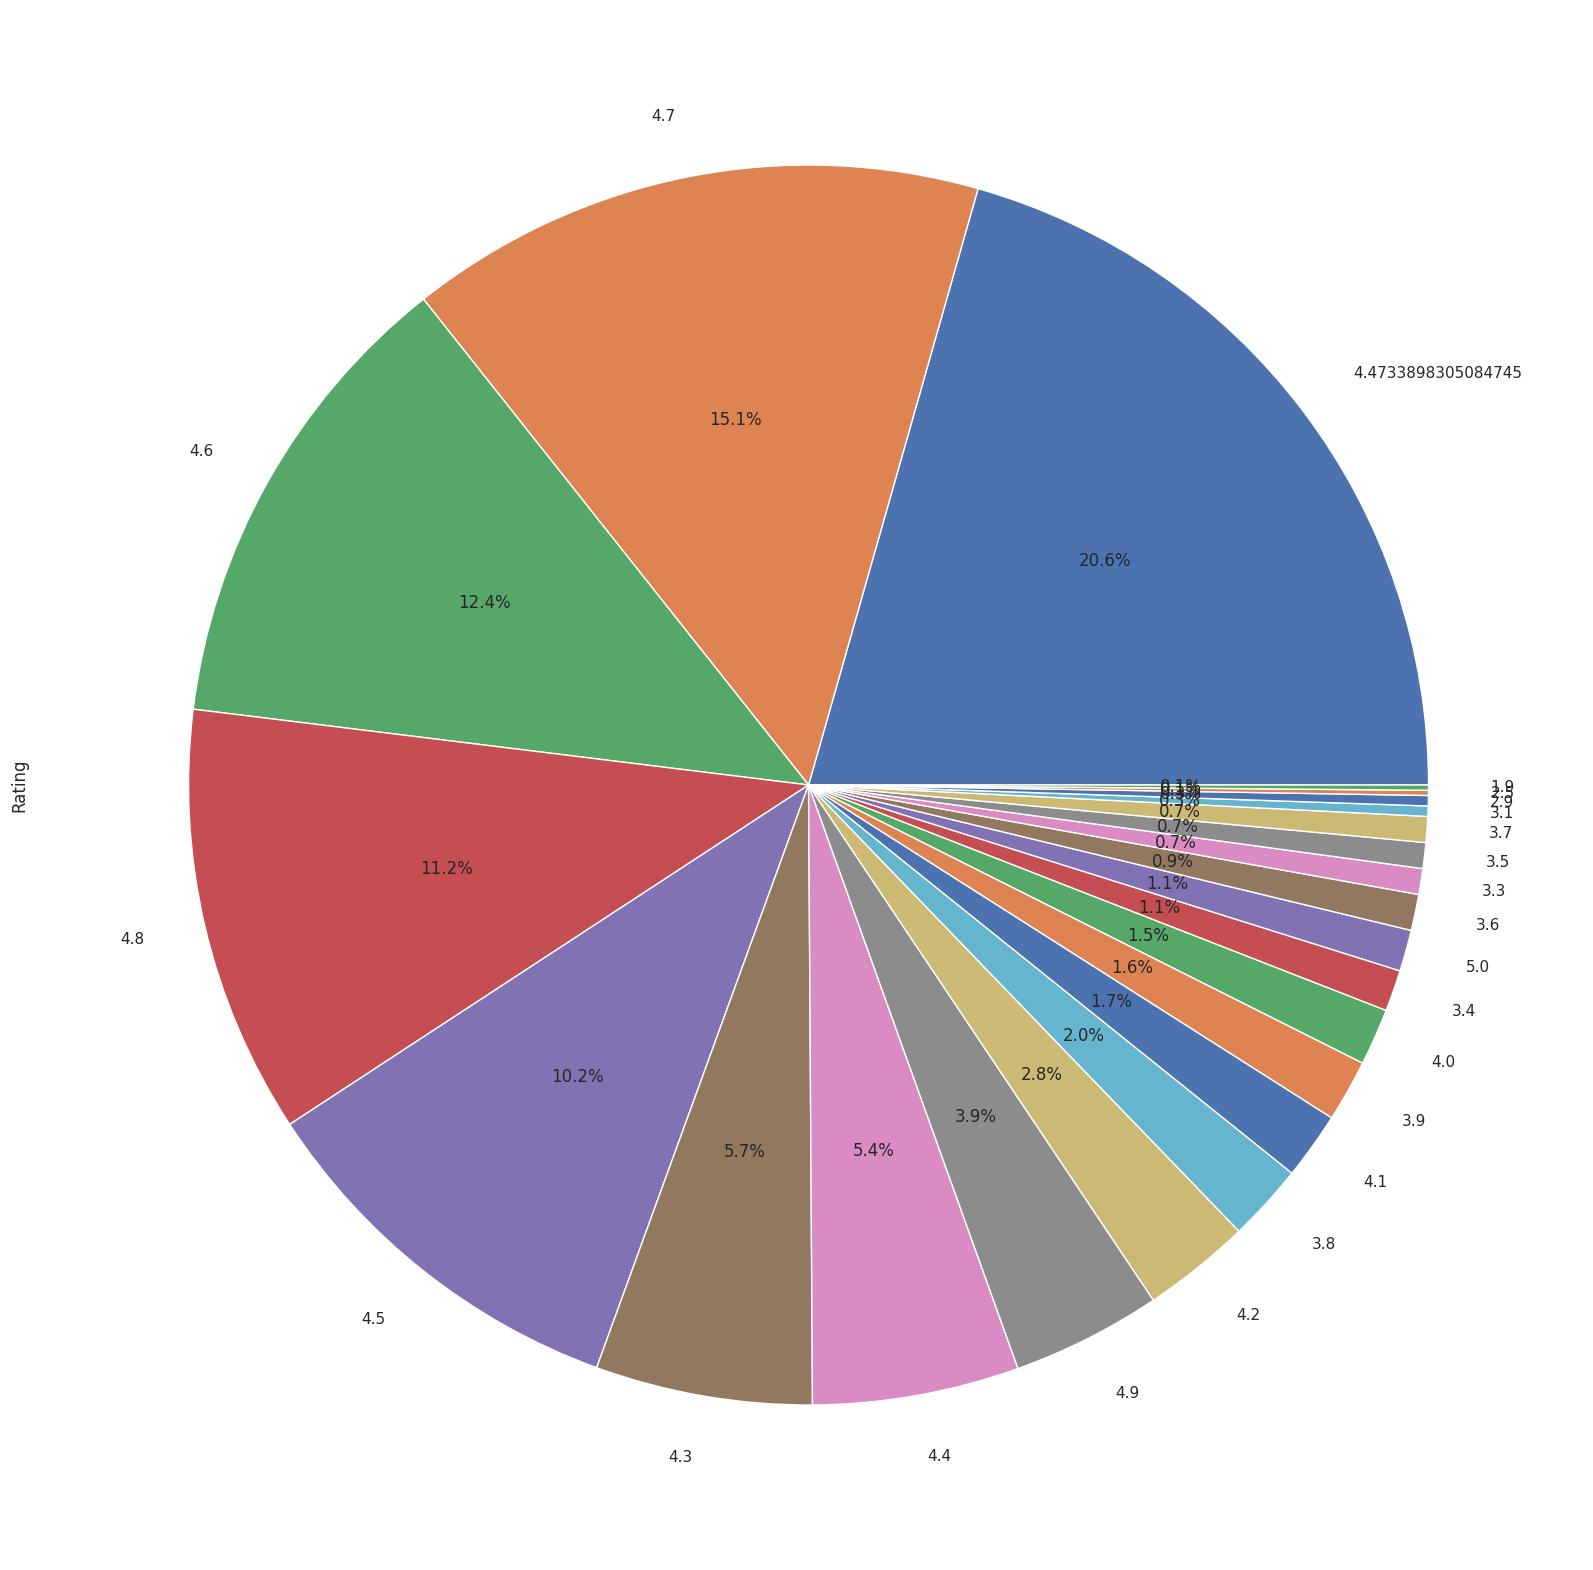

In [ ]:
#distribution according to the rating
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35))
plt.show()

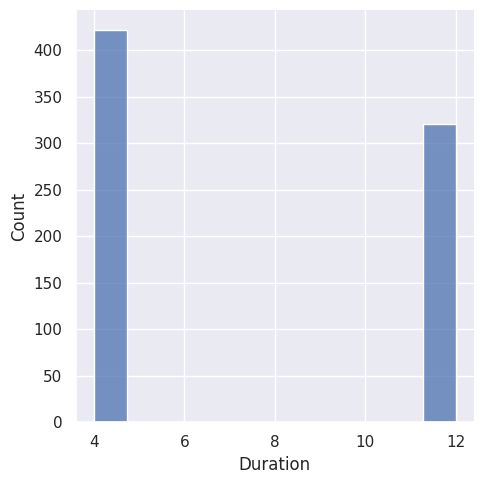

In [ ]:
# Plotting the distribution of 'Duration'
sns.displot(df['Duration'])

<ipython-input-110-be12acaa35e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

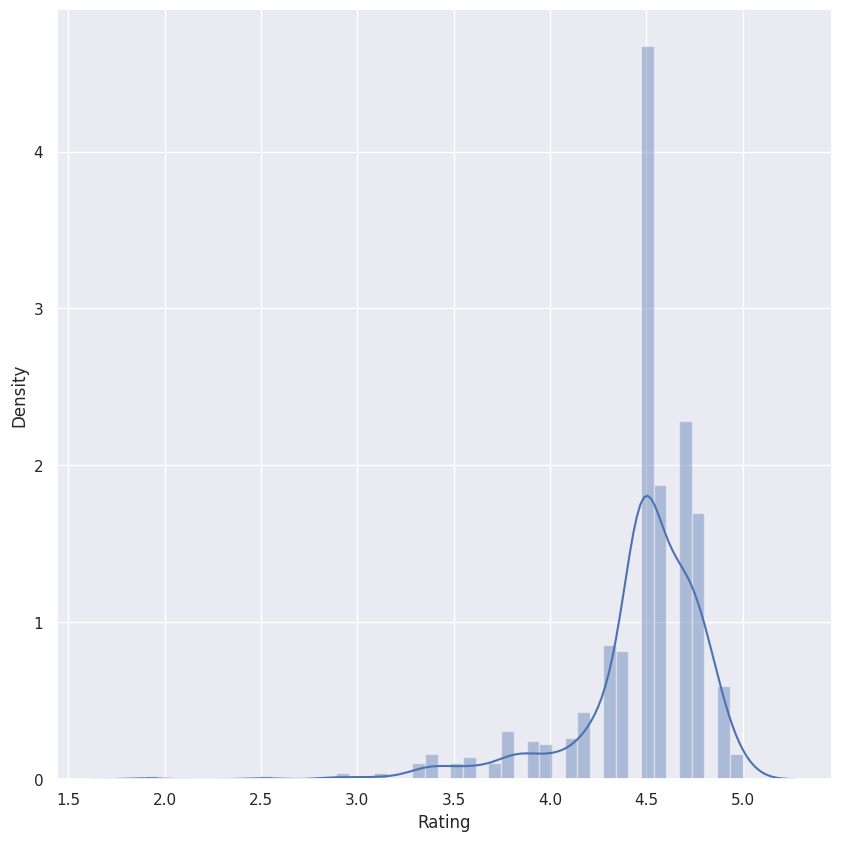

In [ ]:
#Rating Distribution
sns.distplot(df['Rating'])

<Figure size 3000x3000 with 0 Axes>

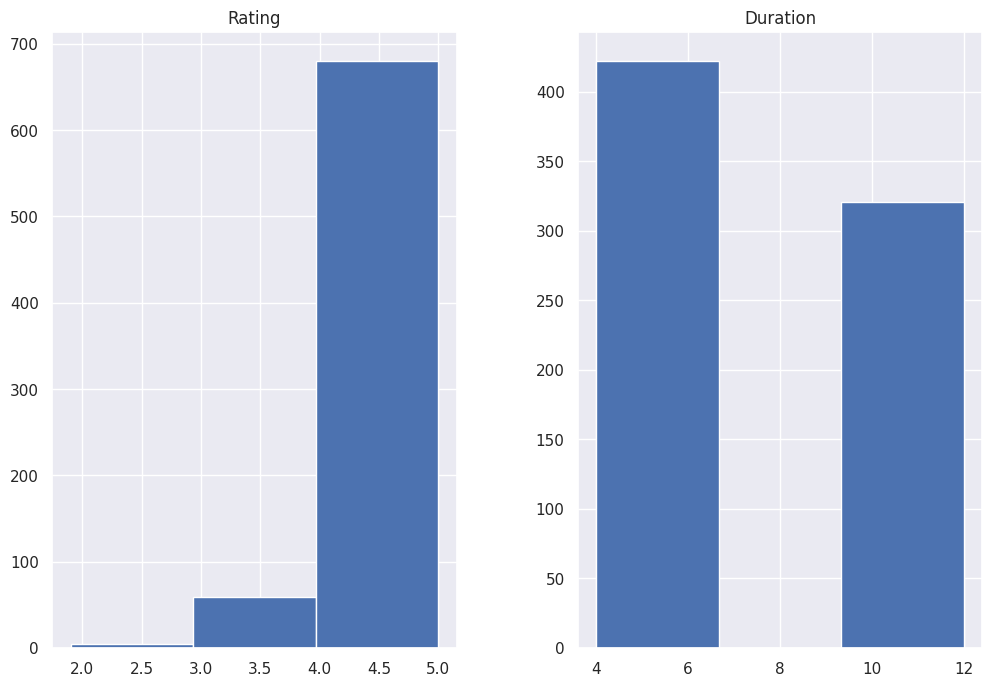

In [ ]:
#distribution of numerical variables
plt.figure(figsize=(30,30))
df.hist(bins=3,figsize=(12,8));

<ipython-input-114-309a9ef00e5b>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_new = df_data.pivot('Rating' , 'Level', 0)
<ipython-input-114-309a9ef00e5b>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_new = df_data.pivot('Rating'  , 'Duration' ,  0)


<Axes: xlabel='Duration', ylabel='Rating'>

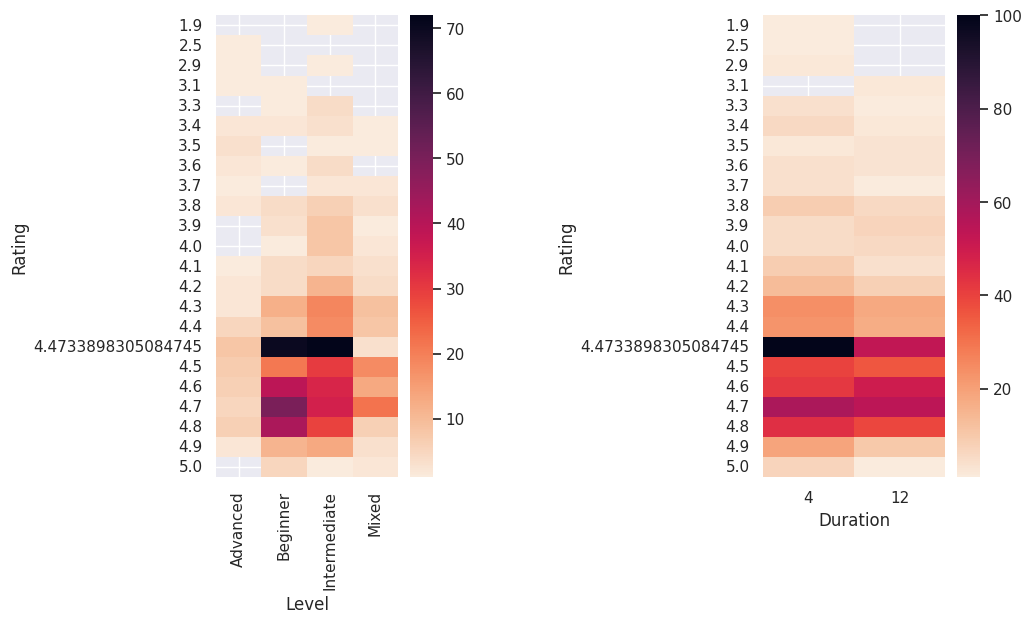

In [ ]:
#Visualizing correlation
plt.figure(figsize = (10,6))

plt.subplot(1,3,1)
df_data = df.groupby(['Rating' , 'Level']).size().reset_index()
df_new = df_data.pivot('Rating' , 'Level', 0)
sns.heatmap(df_new , cmap='rocket_r')

plt.subplot(1,3,3)
df_data = df.groupby(['Rating'  , 'Duration' ]).size().reset_index()
df_new = df_data.pivot('Rating'  , 'Duration' ,  0)
sns.heatmap(df_new , cmap='rocket_r')

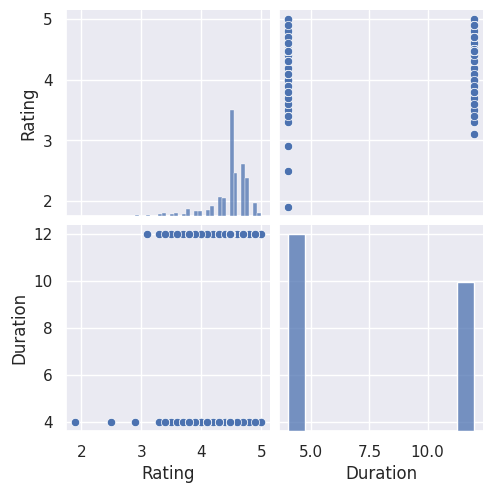

In [ ]:
#Visualise relationship between each two columns
sns.pairplot(df)

##Questions



**1. What are the top-rated *data analysis courses on Coursera based on user ratings?**


In [ ]:
top3= df.sort_values(by='Rating', ascending=False)[['Rating', 'Name']].head(3)
top3

,Rating,Name
495,5.0,Human Decision Making and its Biases
518,5.0,Foundations of Machine Learning
305,5.0,Setting a Generative AI Strategy


**2. Is there any correlation between the level of the course and duration ?**





<ipython-input-118-a3c631da5daa>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_new = df_data.pivot('Level'  , 'Duration' ,  0)


<Axes: xlabel='Duration', ylabel='Level'>

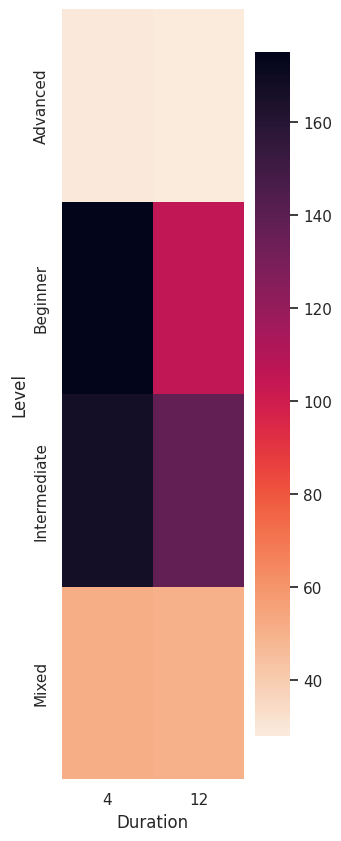

In [ ]:
plt.subplot(1,3,3)
df_data = df.groupby(['Level'  , 'Duration' ]).size().reset_index()
df_new = df_data.pivot('Level'  , 'Duration' ,  0)
sns.heatmap(df_new , cmap='rocket_r')

**3.Who are the most prominent educators for data analysis courses on
Coursera?**

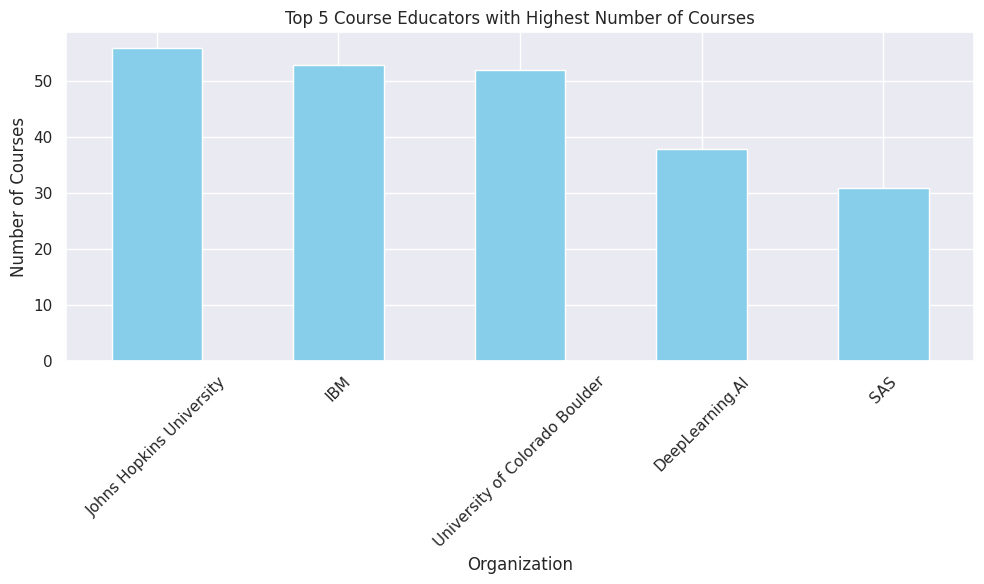

In [ ]:
# Get the top organizations with the highest number of courses
top_organizations = df['Organization'].value_counts().head()

# Plot
plt.figure(figsize=(10, 6))
top_organizations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Course Educators with Highest Number of Courses')
plt.xlabel('Organization')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**4.Do courses taught by specific educators tend to have higher ratings ?**





Text(0, 0.5, 'Course Educator')

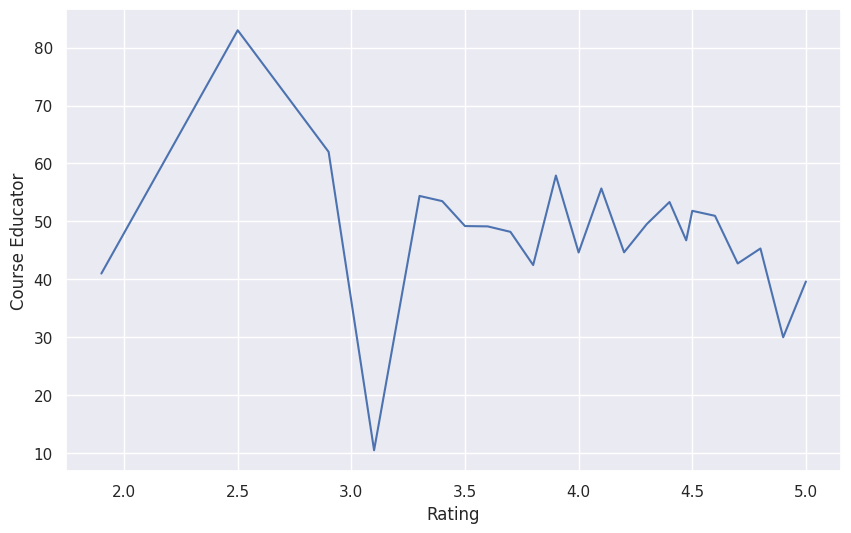

In [ ]:
le = LabelEncoder()
df['Organization'] = le.fit_transform(df['Organization'])
average_gross = df.groupby('Rating')['Organization'].mean()
plt.figure(figsize=(10,6))
average_gross.plot()
plt.ylabel('Course Educator')

**5.How do the number of courses vary across different levels?**

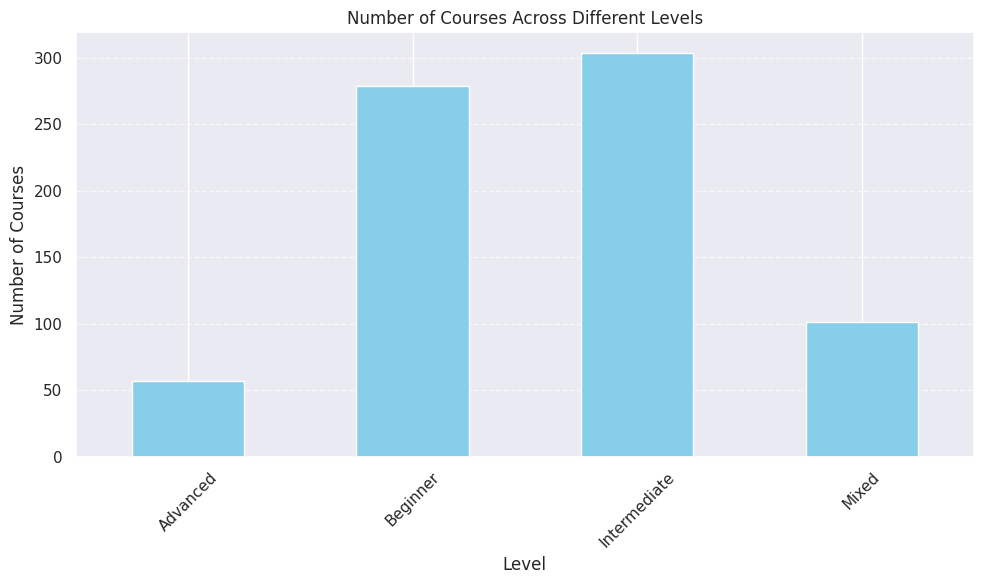

In [ ]:
course_counts = df.groupby('Level')['Name'].nunique()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
course_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Courses Across Different Levels')
plt.xlabel('Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## **Modeling and Communication**:



# 1. Preprocessing Data:

- Categorization and Encoding:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Categorize the ratings
df['RatingCategory'] = pd.cut(df['Rating'], bins=[0, 4.0, 4.5, 5.0], right=True, labels=['Low', 'Medium', 'High'])

# Encode categorical variables
label_encoders = {}
for column in ['Level','Organization']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


# 2. Splitting Data into Training and Testing Sets:

In [4]:

# Split data into features and target
X = df[['Organization', 'Level', 'Duration']]
y = df['RatingCategory']

# Split data into training %80 and %20 testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few entries of the transformed and split data
X_train.head(), y_train.head()
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (594, 3)
Shape of testing feature: (149, 3)
Shape of training label: (594,)
Shape of training label: (149,)


# 3. Establishing and Evaluating a Baseline Decision Tree Model:





In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Establish a baseline model using Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_baseline = dt_classifier.predict(X_test)

# Manually specify class names
target_names = ['Low', 'Medium', 'High']

# Evaluate the baseline model
baseline_report = classification_report(y_test, y_pred_baseline, target_names=target_names)

print(baseline_report)

              precision    recall  f1-score   support

         Low       0.65      0.75      0.70        64
      Medium       0.29      0.28      0.29        18
        High       0.64      0.55      0.59        67

    accuracy                           0.60       149
   macro avg       0.53      0.53      0.52       149
weighted avg       0.60      0.60      0.60       149



# 4. Implementing and Comparing Random Forest and Gradient Boosting Classifiers:

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Manually specify class names
target_names = ['Low', 'Medium', 'High']

# Evaluate the models
rf_report = classification_report(y_test, y_pred_rf, target_names=target_names)
gb_report = classification_report(y_test, y_pred_gb, target_names=target_names)

print("Random Forest Report:\n", rf_report)
print("Gradient Boosting Report:\n", gb_report)

Random Forest Report:
               precision    recall  f1-score   support

         Low       0.64      0.58      0.61        64
      Medium       0.46      0.33      0.39        18
        High       0.55      0.64      0.59        67

    accuracy                           0.58       149
   macro avg       0.55      0.52      0.53       149
weighted avg       0.58      0.58      0.57       149

Gradient Boosting Report:
               precision    recall  f1-score   support

         Low       0.63      0.61      0.62        64
      Medium       0.50      0.22      0.31        18
        High       0.58      0.69      0.63        67

    accuracy                           0.60       149
   macro avg       0.57      0.51      0.52       149
weighted avg       0.59      0.60      0.59       149



# 5. Visual Comparison of F1-Scores for Random Forest and Gradient Boosting Models:

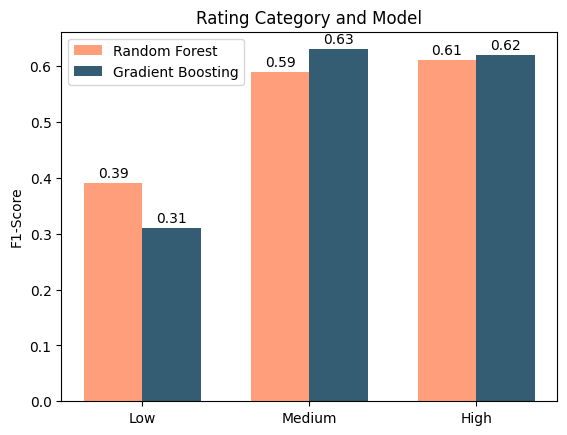

In [7]:
# Re-creating the plot to avoid internal errors
import matplotlib.pyplot as plt
import numpy as np

# Assuming the same F1-scores data as before
f1_scores = {
    'Random Forest': {'Low': 0.39, 'Medium': 0.59, 'High': 0.61},
    'Gradient Boosting': {'Low': 0.31, 'Medium': 0.63, 'High': 0.62}
}

# Prepare data for plotting
categories = list(f1_scores['Random Forest'].keys())
rf_scores = [f1_scores['Random Forest'][cat] for cat in categories]
gb_scores = [f1_scores['Gradient Boosting'][cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='#FF9E7A')
rects2 = ax.bar(x + width/2, gb_scores, width, label='Gradient Boosting', color='#345C72')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_title('Rating Category and Model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

plt.show()

# **Summary**


Both the Random Forest and Gradient Boosting models showed similar or slightly improved performance compared to the baseline Decision Tree in some aspects. However, the Gradient Boosting Machine matches the baseline Decision Tree in overall accuracy and generally provides a better balance between precision and recall across the classes.

Given these results:
Gradient Boosting might be a preferable choice for the final model given its performance on the medium and high classes. Further tuning of model parameters or exploring feature engineering could enhance performance.